#This notebook explores the effect of q$_{min}$ of S(Q) on the resulting F(r) and g(r)

Diffraction data can almost never be collected to a $2\theta$ value of zero. The primary beam is too strong and thus a beam stop is needed in order to avoid exposure of the primary beam to the detector. Depending on the distance of the detector from the sample, the size of the beam stop and the used energy/wavelength the resulting data will start at a Q of somehwere between .5 $\mathring A^{-1}$ and 1.5 $\mathring A^{-1}$.

In [11]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt

sys.path.insert(1, os.path.join(os.getcwd(), '../../'))
from glassure.core.calc import calculate_fr, calculate_sq, optimize_sq, calculate_gr
from glassure.core.utility import extrapolate_to_zero_poly, extrapolate_to_zero_linear
from glassure.core import Spectrum
import numpy as np

from IPython.html import widgets

#1. Working with a toy S(q)

(-0.1, 1.1)

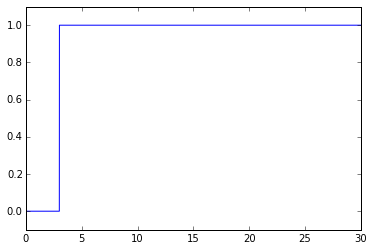

In [12]:
x = np.arange(0,30, 0.01)
y = np.ones(x.shape)
y[x<3]=0
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

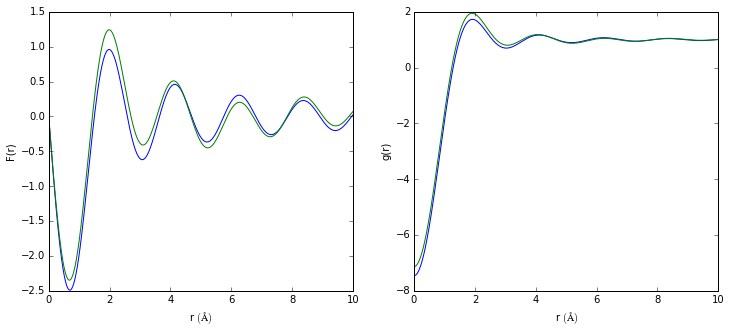

In [13]:
sq_simulated = Spectrum(x, y)
fr_simulated=calculate_fr(sq_simulated)
gr_simulated=calculate_gr(fr_simulated, 2.5, {'Si':1})

def plot_simulated(q_min):
    fr_simulated_m = calculate_fr(sq_simulated.limit(q_min, 30))
    gr_simulated_m = calculate_gr(fr_simulated_m, 2.5, {'Si':1})
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(*fr_simulated.data)
    plt.plot(*fr_simulated_m.data)
    plt.xlabel('r $(\AA)$')
    plt.ylabel('F(r)')
    
    plt.subplot(1,2,2)
    plt.plot(*gr_simulated.data)
    plt.plot(*gr_simulated_m.data)
    plt.xlabel('r $(\AA)$')
    plt.ylabel('g(r)')
    
slider = widgets.FloatSlider(min=0, max=3, value=1)
    
widgets.interactive(plot_simulated, q_min=slider)

#2. Lets do the same with real data

We are going to load a data spectrum and background Spectrum of $Mg_2SiO_4$. The data is not optimal since it was not corrected for self absorption or oblique x-ray incidence on the detector. A way to try to correct for this is the ptimization of the S(Q), which is described in Eggert et al. (2002). This is very useful for the data analysis of total scattering experiments from a sample loaded in a diamond anvil cell were the background might change with compression. 

##2.1 Extrapolation prior to Optimization
In the first example we will calculate S(Q) from the original data, then extrapolate the spectrum to zero and afterwards
optimize the S(Q). The visualization what happens to F(r) and g(r) when cutting the S(Q) spectrum at different Q values.

###2.1.1 Original data 

(0, 1.2)

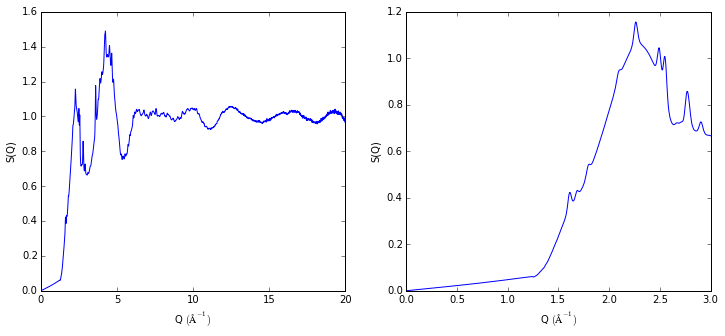

In [14]:
data_spectrum = Spectrum.from_file('../tests/data/Mg2SiO4_ambient.xy')
bkg_spectrum = Spectrum.from_file('../tests/data/Mg2SiO4_ambient_bkg.xy')
sample_spectrum = data_spectrum - bkg_spectrum

composition = {'Mg': 2, 'Si':1, 'O':4}
density = 2.9

sq = calculate_sq(sample_spectrum.limit(0, 20), density, composition)
sq1 = extrapolate_to_zero_linear(sq)
sq1_opt = optimize_sq(sq1, 1.5, 50, 0.088)

plt.figure(figsize=(12, 5))
plt.subplot(1,2, 1)
plt.plot(*sq1_opt.data)
plt.xlabel('Q $(\AA^{-1})$')
plt.ylabel('S(Q)')
plt.subplot(1,2,2)
plt.plot(*sq1_opt.data)
plt.xlabel('Q $(\AA^{-1})$')
plt.ylabel('S(Q)')
plt.xlim(0, 3)
plt.ylim(0, 1.2)

###2.1.2 Effect to F(r) and g(r)

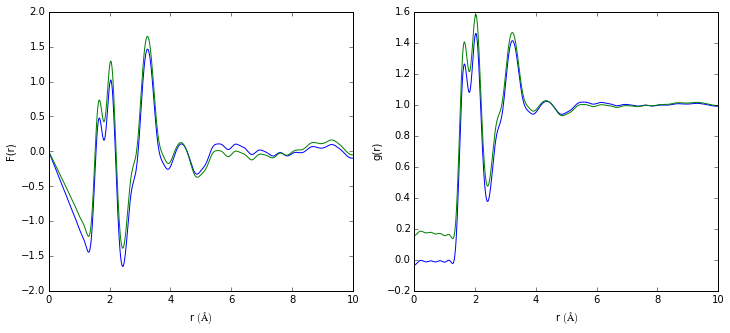

In [15]:
fr1 = calculate_fr(sq1_opt, use_modification_fcn=True)
gr1 = calculate_gr(fr1, density, composition)

def plot_all1(q_min):
    fr1_m = calculate_fr(sq1_opt.limit(q_min, 40), use_modification_fcn=True)
    gr1_m = calculate_gr(fr1_m, density, composition)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(*fr1.data)
    plt.plot(*fr1_m.data)
    plt.xlabel('r $(\AA)$')
    plt.ylabel('F(r)')
    
    plt.subplot(1,2,2)
    plt.plot(*gr1.data)
    plt.plot(*gr1_m.data)
    plt.xlabel('r $(\AA)$')
    plt.ylabel('g(r)')
    
slider = widgets.FloatSlider(min=0, max=2, value=1)
    
widgets.interactive(plot_all1, q_min=slider)
    

##2.2 Optimization prior to Extrapolation 

In this example we will optimize the example data and afterwards do the extrapolation to zero.  

###2.2.1 Original Data

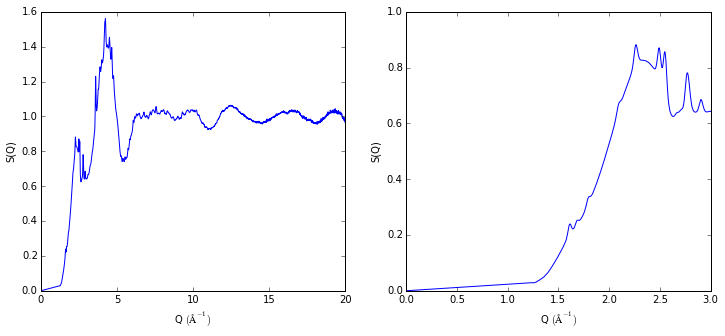

In [16]:
sq2 = calculate_sq(sample_spectrum.limit(0, 20), density, composition)
sq2 = optimize_sq(sq2, 1.5, 50, 0.088)
sq2 = extrapolate_to_zero_linear(sq2)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(*sq2.data)
plt.xlabel('Q $(\AA^{-1})$')
plt.ylabel('S(Q)')
plt.subplot(1, 2, 2)
plt.plot(*sq2.data)
plt.xlim(0, 3)
plt.ylim(0, 1)
plt.xlabel('Q $(\AA^{-1})$')
plt.ylabel('S(Q)')

###2.2.2 Changes in F(r) and g(r)

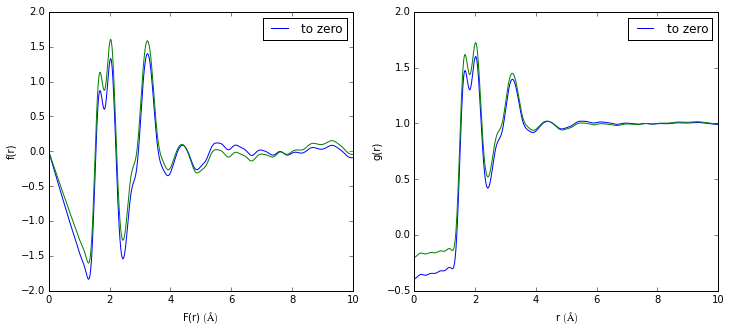

In [17]:
fr2 = calculate_fr(sq2, use_modification_fcn=True)
gr2 = calculate_gr(fr2, density, composition)

def plot_all2(q_min):
    fr2_m = calculate_fr(sq2.limit(q_min, 40), use_modification_fcn=True)
    gr2_m = calculate_gr(fr2_m, density, composition)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(*fr2.data, label = "to zero")
    plt.plot(*fr2_m.data)
    plt.legend(loc='best')
    plt.xlabel('F(r) $(\AA)$')
    plt.ylabel('f(r)')
    plt.subplot(1,2,2)
    
    plt.plot(*gr2.data, label = "to zero")
    plt.plot(*gr2_m.data)
    plt.legend(loc='best')
    plt.xlabel('r $(\AA)$')
    plt.ylabel('g(r)')
    
    
slider = widgets.FloatSlider(min=0, max=2, value=1)
    
widgets.interactive(plot_all2, q_min=slider)
    

Is it easy to see from the low r region of the g(r) that this is not working correctly, since the optimization basically defined a density using the initial q minimum cutoff of about 1.2 (which results in a different slope in f(r)). So the g(r) is only zero below r_min (1.5) when we choose an q_min of 1.2.

##2.3 Cutting the original data at different minimum q

The above examples have shown that a change in minimum Q used has a strong effect on density (initial slope in f(r)) and on intensities in g(r) (resulting in different coordination numbers).

I think the most sensible way is to always do an extrapolation to zero in order get reproducible data.

Another issue which can be explored is cutting the original sample data at different Q$_{min}$ values and then applying extrapolation to zero and optimization and see the effect on the resulting f(r) and g(r). This is very applicable to normal data collections. Due to different sizes in beam stops the Q$_{min}$ for each beamline, data collection, or used energy might be different.

###2.3.1 Using linear Extrapolation

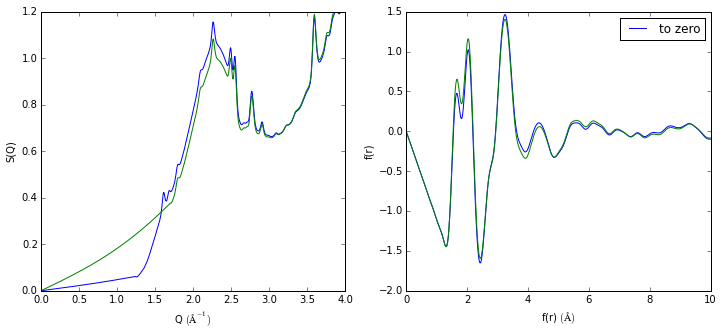

In [18]:
sq3 = calculate_sq(sample_spectrum.limit(0, 20), density, composition)
sq3_extrapolated = extrapolate_to_zero_linear(sq3)
sq3_opt = optimize_sq(sq3_extrapolated, 1.5, 50, 0.088)

fr3 = calculate_fr(sq3_opt, use_modification_fcn=True)

def plot_all3(q_min):
    sq3_m = calculate_sq(sample_spectrum.limit(q_min, 20),density, composition)
    sq3_m_extrapolated = extrapolate_to_zero_linear(sq3_m)
    sq3_m_opt = optimize_sq(sq3_m_extrapolated, 1.5, 50, 0.088)
    fr3_m = calculate_fr(sq3_m_opt, use_modification_fcn=True)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(*sq3_opt.data)
    plt.plot(*sq3_m_opt.data)
    plt.xlim(0, 4)
    plt.ylim(0, 1.2)
    plt.xlabel('Q $(\AA^{-1})$')
    plt.ylabel('S(Q)')
    plt.subplot(1, 2, 2)
    plt.plot(*fr3.data, label = "to zero")
    plt.plot(*fr3_m.data)
    plt.legend(loc='best')
    plt.xlabel('f(r) $(\AA)$')
    plt.ylabel('f(r)')
    
    
slider = widgets.FloatSlider(min=1.2, max=2, value=1.7)
    
widgets.interactive(plot_all3, q_min=slider)

###2.3.2 Using polynomial extrapolation 

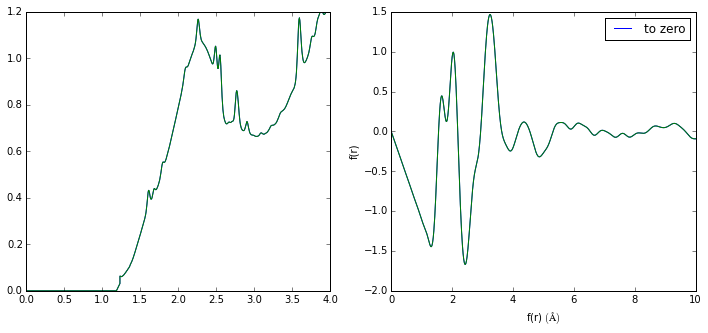

In [19]:
sq4 = calculate_sq(sample_spectrum.limit(0, 20), density, composition)
sq4_extrapolated = extrapolate_to_zero_poly(sq4, 2.1)
sq4_opt = optimize_sq(sq4_extrapolated, 1.5, 50, 0.088)

fr4 = calculate_fr(sq4_opt, use_modification_fcn=True)

def plot_all4(q_min):
    sq4_m = calculate_sq(sample_spectrum.limit(q_min, 20),density, composition)
    sq4_m_extrapolated = extrapolate_to_zero_poly(sq4_m, 2.1)
    sq4_m_opt = optimize_sq(sq4_m_extrapolated, 1.5, 50, 0.088)
    fr4_m = calculate_fr(sq4_m_opt, use_modification_fcn=True)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(*sq4_opt.data)
    plt.plot(*sq4_m_opt.data)
    plt.xlim(0, 4)
    plt.ylim(0, 1.2)
    plt.subplot(1,2,2)
    plt.plot(*fr4.data, label = "to zero")
    plt.plot(*fr4_m.data)
    plt.legend(loc='best')
    plt.xlabel('f(r) $(\AA)$')
    plt.ylabel('f(r)')
    
    
slider = widgets.FloatSlider(min=1.2, max=2, value=1)
    
widgets.interactive(plot_all4, q_min=slider)

### 2.3.2 Set S(Q) to zero below Q$_{min}$

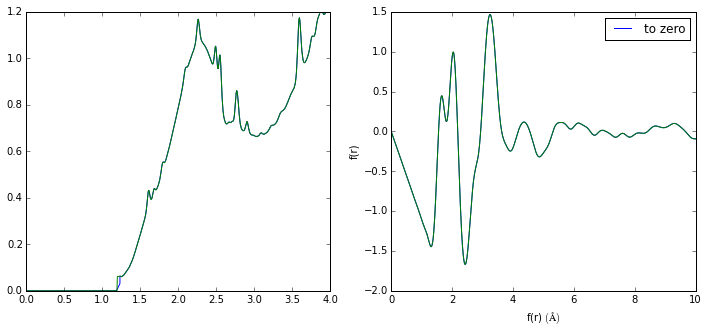

In [20]:
sq5 = calculate_sq(sample_spectrum.limit(0, 20), density, composition)
sq5_extrapolated = extrapolate_to_zero_poly(sq5, 2.1)
sq5_opt = optimize_sq(sq5_extrapolated, 1.5, 50, 0.088)

fr5 = calculate_fr(sq5_opt, use_modification_fcn=True)

def plot_all5(q_min):
    sq5_m = calculate_sq(sample_spectrum.limit(q_min, 20),density, composition)
    sq5_m_extrapolated = extrapolate_to_zero_linear(sq5_m)
    
    x, y = sq5_m_extrapolated.data
    y[x<=q_min]=0
    sq5_m_extrapolated = Spectrum(x, y)
    
    sq5_m_opt = optimize_sq(sq5_m_extrapolated, 1.5, 50, 0.088)
    fr5_m = calculate_fr(sq5_m_opt, use_modification_fcn=True)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(*sq5_opt.data)
    plt.plot(*sq5_m_opt.data)
    plt.xlim(0, 4)
    plt.ylim(0, 1.2)
    plt.subplot(1,2,2)
    plt.plot(*fr5.data, label = "to zero")
    plt.plot(*fr5_m.data)
    plt.legend(loc='best')
    plt.xlabel('f(r) $(\AA)$')
    plt.ylabel('f(r)')
    
    
slider = widgets.FloatSlider(min=1.2, max=2, value=1)
    
widgets.interactive(plot_all5, q_min=slider)

#3. Conclusion

Based on the above exploration of all the possibilities for using extrapolation in combinization with optimization I came to the following conclusions

  - Extrapolation to zero should be always used since otherwise the density shown in the initial slope of the F(r) is different
  - Extrapolation of the data to zero should be done prior to optimization (see section 2.1/2.2)
  - the polynomial extrapolation has the smallest effect on the resulting F(r) and g(r)
 
  

